In [2]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 0

plt.rcParams.update({
    "font.family": ["serif"],
    "font.sans-serif": ["Roboto"],
    "font.size": 9,
    "axes.labelsize": 11,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    'figure.figsize': (15.0, 4.0),
    'axes.grid': False,
    'axes.spines.left': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True,
})

np.set_printoptions(suppress=True)

warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('full.csv')

BETTER_COLUMN_NAMES = {
    'id_1': 'id_1',
    'id_2': 'id_2',
    'Gender': 'gender',
    'Customer Type': 'customer_type',
    'Age': 'age',
    'Type of Travel': 'type_of_travel',
    'Class': 'ticket_class',
    'Flight Distance': 'flight_distance',
    'Inflight wifi service': 'wifi_service',
    'Departure/Arrival time convenient': 'departure_arrival_time_convenient',
    'Ease of Online booking': 'online_booking',
    'Gate location': 'gate_location',
    'Food and drink': 'food_and_drink',
    'Online boarding': 'online_boarding',
    'Seat comfort': 'seat_comfort',
    'Inflight entertainment': 'inflight_entertainment',
    'On-board service': 'onboard_service',
    'Leg room service': 'leg_room',
    'Baggage handling': 'baggage_handling',
    'Checkin service': 'checkin',
    'Inflight service': 'inflight_service',
    'Cleanliness': 'cleanliness',
    'Departure Delay in Minutes': 'departure_delay',
    'Arrival Delay in Minutes': 'arrival_delay',
    'satisfaction': 'satisfaction',
}

dataset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)
dataset.set_index('id_1', inplace=True)
# dataset

## PUNTO 2.1

In [ ]:
dataset.satisfaction.value_counts().plot.bar(rot=0)

## PUNTO 2.2

#### Columnas a usar:
    - customer_type
    - ticket_class
    - flight_distance -> GENDER
    - cleanliness
    - arrival_delay -> INFLIHT_SERVICE

### customer_type

In [ ]:
dataset.customer_type.value_counts().plot.bar(rot=0)

In [ ]:
# OlD VERSION:
# resultados_customer = customer_group["satisfaction"].value_counts()
# resultados_customer.plot.bar()

df_loyal_customers = dataset[(dataset.customer_type == "Loyal Customer")]
df_disloyal_customers = dataset[(dataset.customer_type == "disloyal Customer")]

unsatisfied_loyal_customers = df_loyal_customers['satisfaction'].value_counts()["neutral or dissatisfied"]
unsatisfied_disloyal_customers = df_disloyal_customers['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_loyal_customers = df_loyal_customers['satisfaction'].value_counts()["satisfied"]
satisfied_disloyal_customers = df_disloyal_customers['satisfaction'].value_counts()["satisfied"]

satisfied_ppl = [satisfied_loyal_customers, satisfied_disloyal_customers]
unsatisfied_ppl = [unsatisfied_loyal_customers, unsatisfied_disloyal_customers]
index = ['Loyal Customers', 'Disloyal Customers']
df = pd.DataFrame({'Satisfied': satisfied_ppl,
                    'Unsatisfied': unsatisfied_ppl}, index=index)
ax = df.plot.bar(rot=0, color={"Satisfied": "green", "Unsatisfied": "red"})

### cleanliness

In [ ]:
dataset.cleanliness.value_counts().reindex([1, 2, 3, 4, 5]).plot.bar(rot=0)

In [ ]:
# OlD VERSION:
# cleanliness_group = dataset.groupby(["cleanliness"])
# resultados = cleanliness_group["satisfaction"].value_counts()
# resultados.plot.bar()

df_cleanliness_1 = dataset[(dataset.cleanliness == 1)]
df_cleanliness_2 = dataset[(dataset.cleanliness == 2)]
df_cleanliness_3 = dataset[(dataset.cleanliness == 3)]
df_cleanliness_4 = dataset[(dataset.cleanliness == 4)]
df_cleanliness_5 = dataset[(dataset.cleanliness == 5)]

unsatisfied_cleanliness_1 = df_cleanliness_1['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_cleanliness_1 = df_cleanliness_1['satisfaction'].value_counts()["satisfied"]

unsatisfied_cleanliness_2 = df_cleanliness_2['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_cleanliness_2 = df_cleanliness_2['satisfaction'].value_counts()["satisfied"]

unsatisfied_cleanliness_3 = df_cleanliness_3['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_cleanliness_3 = df_cleanliness_3['satisfaction'].value_counts()["satisfied"]

unsatisfied_cleanliness_4 = df_cleanliness_4['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_cleanliness_4 = df_cleanliness_4['satisfaction'].value_counts()["satisfied"]

unsatisfied_cleanliness_5 = df_cleanliness_5['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_cleanliness_5 = df_cleanliness_5['satisfaction'].value_counts()["satisfied"]


satisfied_ppl = [satisfied_cleanliness_1, satisfied_cleanliness_2, satisfied_cleanliness_3, satisfied_cleanliness_4, satisfied_cleanliness_5]
unsatisfied_ppl = [unsatisfied_cleanliness_1, unsatisfied_cleanliness_2, unsatisfied_cleanliness_3, unsatisfied_cleanliness_4,unsatisfied_cleanliness_5 ]
index = ['Cleanliness 1', 'Cleanliness 2', 'Cleanliness 3', 'Cleanliness 4', 'Cleanliness 5']
df = pd.DataFrame({'Satisfied': satisfied_ppl,
                    'Unsatisfied': unsatisfied_ppl}, index=index)
ax = df.plot.bar(rot=0, color={"Satisfied": "green", "Unsatisfied": "red"})

### ticket_class

In [ ]:
dataset.ticket_class.value_counts().reindex(["Business", "Eco Plus", "Eco"]).plot.bar(rot=0)

In [ ]:
# OlD VERSION:
# resultados_ticket = ticket_group["satisfaction"].value_counts()
# resultados_ticket.plot.bar()

df_business = dataset[(dataset.ticket_class == "Business")]
df_eco_plus = dataset[(dataset.ticket_class == "Eco Plus")]
df_eco = dataset[(dataset.ticket_class == "Eco")]

unsatisfied_business = df_business['satisfaction'].value_counts()["neutral or dissatisfied"]
unsatisfied_eco_plus = df_eco_plus['satisfaction'].value_counts()["neutral or dissatisfied"]
unsatisfied_eco = df_eco['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_business = df_business['satisfaction'].value_counts()["satisfied"]
satisfied_eco_plus = df_eco_plus['satisfaction'].value_counts()["satisfied"]
satisfied_eco = df_eco['satisfaction'].value_counts()["satisfied"]

satisfied_ppl = [satisfied_business, satisfied_eco_plus, satisfied_eco]
unsatisfied_ppl = [unsatisfied_business, unsatisfied_eco_plus, unsatisfied_eco]
index = ['Business', 'Economy Plus', 'Economy']
df = pd.DataFrame({'Satisfied': satisfied_ppl,
                    'Unsatisfied': unsatisfied_ppl}, index=index)
ax = df.plot.bar(rot=0, color={"Satisfied": "green", "Unsatisfied": "red"})

### gender

In [ ]:
dataset.gender.value_counts().plot.bar(rot=0)

In [ ]:
# OLD GENDER
#gender_group = dataset.groupby(["gender"])
#dataset.gender.value_counts().plot.bar()
#resultados_gender = gender_group["satisfaction"].value_counts()
#resultados_gender.plot.bar()

df_gender_female = dataset[(dataset.gender == "Female")]
df_gender_masculine = dataset[(dataset.gender == "Male")]


unsatisfied_gender_female = df_gender_female['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_gender_female = df_gender_female['satisfaction'].value_counts()["satisfied"]

unsatisfied_gender_male = df_gender_masculine['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_gender_male = df_gender_masculine['satisfaction'].value_counts()["satisfied"]

satisfied_ppl = [satisfied_gender_female, satisfied_gender_male]
unsatisfied_ppl = [unsatisfied_gender_female, unsatisfied_gender_male]
index = ['Female', 'Male']
df = pd.DataFrame({'Satisfied': satisfied_ppl,
                    'Unsatisfied': unsatisfied_ppl}, index=index)
ax = df.plot.bar(rot=0, color={"Satisfied": "green", "Unsatisfied": "red"})

### inflight_service

In [ ]:
datasetinflight_service.value_counts().reindex([1, 2, 3, 4, 5]).plot.bar(rot=0)

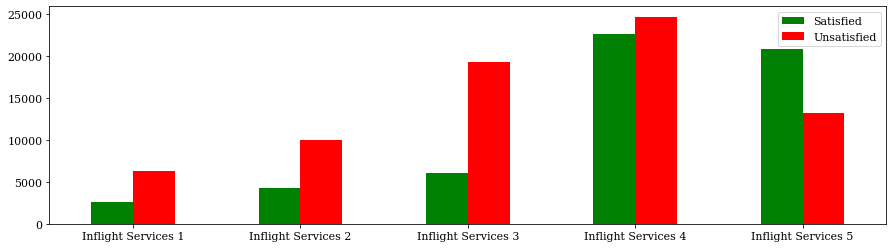

In [8]:
#OLD INFLIGHT_SERVICES
#inflight_service_group = dataset.groupby(["inflight_service"])
#dataset.inflight_service.value_counts().reindex([1, 2, 3, 4, 5]).plot.bar(rot=0)
#resultados_inflight_service = inflight_service_group["satisfaction"].value_counts()
#resultados_inflight_service.plot.bar()

df_inflightServices_1 = dataset[(dataset.inflight_service == 1)]
df_inflightServices_2 = dataset[(dataset.inflight_service == 2)]
df_inflightServices_3 = dataset[(dataset.inflight_service == 3)]
df_inflightServices_4 = dataset[(dataset.inflight_service == 4)]
df_inflightServices_5 = dataset[(dataset.inflight_service == 5)]

unsatisfied_inflightServices_1 = df_inflightServices_1['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_inflightServices_1 = df_inflightServices_1['satisfaction'].value_counts()["satisfied"]

unsatisfied_inflightServices_2 = df_inflightServices_2['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_inflightServices_2 = df_inflightServices_2['satisfaction'].value_counts()["satisfied"]

unsatisfied_inflightServices_3 = df_inflightServices_3['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_inflightServices_3 = df_inflightServices_3['satisfaction'].value_counts()["satisfied"]

unsatisfied_inflightServices_4 = df_inflightServices_4['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_inflightServices_4 = df_inflightServices_4['satisfaction'].value_counts()["satisfied"]

unsatisfied_inflightServices_5 = df_inflightServices_5['satisfaction'].value_counts()["neutral or dissatisfied"]
satisfied_inflightServices_5 = df_inflightServices_5['satisfaction'].value_counts()["satisfied"]

satisfied_ppl = [satisfied_inflightServices_1, satisfied_inflightServices_2, satisfied_inflightServices_3, satisfied_inflightServices_4, satisfied_inflightServices_5]
unsatisfied_ppl = [unsatisfied_inflightServices_1, unsatisfied_inflightServices_2, unsatisfied_inflightServices_3, unsatisfied_inflightServices_4,unsatisfied_inflightServices_5 ]
index = ['Inflight Services 1', 'Inflight Services 2', 'Inflight Services 3', 'Inflight Services 4', 'Inflight Services 5']
df = pd.DataFrame({'Satisfied': satisfied_ppl,
                    'Unsatisfied': unsatisfied_ppl}, index=index)
ax = df.plot.bar(rot=0, color={"Satisfied": "green", "Unsatisfied": "red"})